In [1]:
# Import statments and plot figures inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
whole = pd.read_csv('complete_dataset-002.csv')

In [3]:
whole.head()

,Unnamed: 0,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,department_id,department
0,24076664,1,1,2539329,2,8,NaN,196,Soda,1,0,77,soft drinks,7,beverages
1,24076665,1,1,2539329,2,8,NaN,14084,Organic Unsweetened Vanilla Almond Milk,2,0,91,soy lactosefree,16,dairy eggs
2,24076666,1,1,2539329,2,8,NaN,12427,Original Beef Jerky,3,0,23,popcorn jerky,19,snacks
3,24076667,1,1,2539329,2,8,NaN,26088,Aged White Cheddar Popcorn,4,0,23,popcorn jerky,19,snacks
4,24076668,1,1,2539329,2,8,NaN,26405,XL Pick-A-Size Paper Towel Rolls,5,0,54,paper goods,17,household


In [4]:
produce = whole[whole['department'] == 'produce']
produce.head()

,Unnamed: 0,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,department_id,department
8,22742747,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,4,produce
25,4089402,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,4,produce
26,4089403,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,4,produce
27,4089404,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,4,produce
28,4089405,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,4,produce


In [5]:
produce['organic?'] = produce['product_name'].str.contains('Organic').astype(int)
produce

<ipython-input-5-078513f6f311>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produce['organic?'] = produce['product_name'].str.contains('Organic').astype(int)


,Unnamed: 0,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,department_id,department,organic?
8,22742747,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,4,produce,1
25,4089402,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,4,produce,1
26,4089403,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,4,produce,0
27,4089404,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,4,produce,0
28,4089405,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,4,produce,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819078,5934987,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,4,produce,1
33819086,5934995,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,4,produce,0
33819088,5934997,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,4,produce,0
33819089,28236061,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,4,produce,0


C:\Users\faris\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


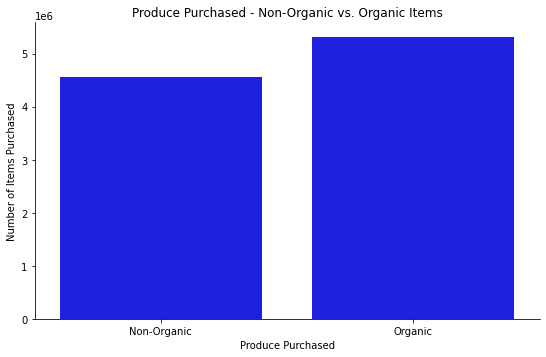

In [6]:
g = sns.factorplot("organic?", data=produce, aspect=1.5, kind="count", color="b")
g.set_xticklabels(['Non-Organic', 'Organic'])
g.set(xlabel='Produce Purchased', ylabel='Number of Items Purchased', title='Produce Purchased - Non-Organic vs. Organic Items')

In [7]:
userorg = produce.groupby('user_id')['organic?'].sum()
userorg

user_id
1           3
2          21
3          23
4           2
5          15
         ... 
206205      7
206206     27
206207     47
206208    154
206209      9
Name: organic?, Length: 194331, dtype: int32

In [8]:
userall = produce.groupby('user_id')['organic?'].count()
userall

user_id
1           5
2          43
3          38
4           2
5          23
         ... 
206205     14
206206     34
206207     50
206208    197
206209     20
Name: organic?, Length: 194331, dtype: int64

In [9]:
organ = pd.concat([userorg, userall], axis=1).reset_index()
organ

,user_id,organic?,organic?
0,1,3,5
1,2,21,43
2,3,23,38
3,4,2,2
4,5,15,23
...,...,...,...
194326,206205,7,14
194327,206206,27,34
194328,206207,47,50
194329,206208,154,197


In [10]:
organ.columns = ['user_id', 'organic_items', 'produce_items']
organ

,user_id,organic_items,produce_items
0,1,3,5
1,2,21,43
2,3,23,38
3,4,2,2
4,5,15,23
...,...,...,...
194326,206205,7,14
194327,206206,27,34
194328,206207,47,50
194329,206208,154,197


In [11]:
organ['no_org'] = organ['produce_items'] - organ['organic_items'] 
organ

,user_id,organic_items,produce_items,no_org
0,1,3,5,2
1,2,21,43,22
2,3,23,38,15
3,4,2,2,0
4,5,15,23,8
...,...,...,...,...
194326,206205,7,14,7
194327,206206,27,34,7
194328,206207,47,50,3
194329,206208,154,197,43


In [12]:
a = organ
a

,user_id,organic_items,produce_items,no_org
0,1,3,5,2
1,2,21,43,22
2,3,23,38,15
3,4,2,2,0
4,5,15,23,8
...,...,...,...,...
194326,206205,7,14,7
194327,206206,27,34,7
194328,206207,47,50,3
194329,206208,154,197,43


In [13]:
table = pd.pivot_table(a, index=['organic_items', 'no_org'], aggfunc=np.sum)
table

produce_items    user_id
organic_items no_org                          
0             1                3934  400961122
              2                5420  283372682
              3                6453  221781562
              4                6884  176012612
              5                7075  148010370
...                             ...        ...
779           165               944      74336
831           82                913      67870
867           245              1112      73080
907           68                975      84474
934           183              1117     105213

[21902 rows x 2 columns]

In [14]:
wc = whole

In [15]:
wc['produce'] = wc['department'].str.contains('produce').astype(int)
wc

,Unnamed: 0,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,department_id,department,produce
0,24076664,1,1,2539329,2,8,NaN,196,Soda,1,0,77,soft drinks,7,beverages,0
1,24076665,1,1,2539329,2,8,NaN,14084,Organic Unsweetened Vanilla Almond Milk,2,0,91,soy lactosefree,16,dairy eggs,0
2,24076666,1,1,2539329,2,8,NaN,12427,Original Beef Jerky,3,0,23,popcorn jerky,19,snacks,0
3,24076667,1,1,2539329,2,8,NaN,26088,Aged White Cheddar Popcorn,4,0,23,popcorn jerky,19,snacks,0
4,24076668,1,1,2539329,2,8,NaN,26405,XL Pick-A-Size Paper Towel Rolls,5,0,54,paper goods,17,household,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,32545756,206209,14,272231,6,14,30.0,40603,Fabric Softener Sheets,4,0,75,laundry,17,household,0
33819102,32545757,206209,14,272231,6,14,30.0,15655,Dark Chocolate Mint Snacking Chocolate,5,0,45,candy chocolate,19,snacks,0
33819103,32545758,206209,14,272231,6,14,30.0,42606,Phish Food Frozen Yogurt,6,0,37,ice cream ice,1,frozen,0
33819104,32545759,206209,14,272231,6,14,30.0,37966,French Baguette Bread,7,0,112,bread,3,bakery,0


C:\Users\faris\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


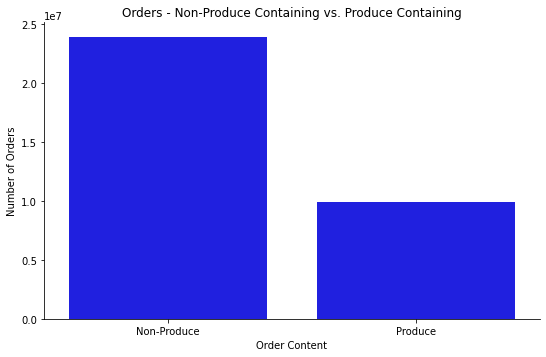

In [16]:
g = sns.factorplot("produce", data=wc, aspect=1.5, kind="count", color="b")
g.set_xticklabels(['Non-Produce', 'Produce'])
g.set(xlabel='Order Content', ylabel='Number of Orders', title='Orders - Non-Produce Containing vs. Produce Containing')

In [17]:
group12 = wc.groupby(['order_number'])['produce'].mean()
group12

order_number
1      0.281215
2      0.281191
3      0.281677
4      0.282426
5      0.283202
         ...   
96     0.332044
97     0.333869
98     0.342738
99     0.325713
100    0.338799
Name: produce, Length: 100, dtype: float64

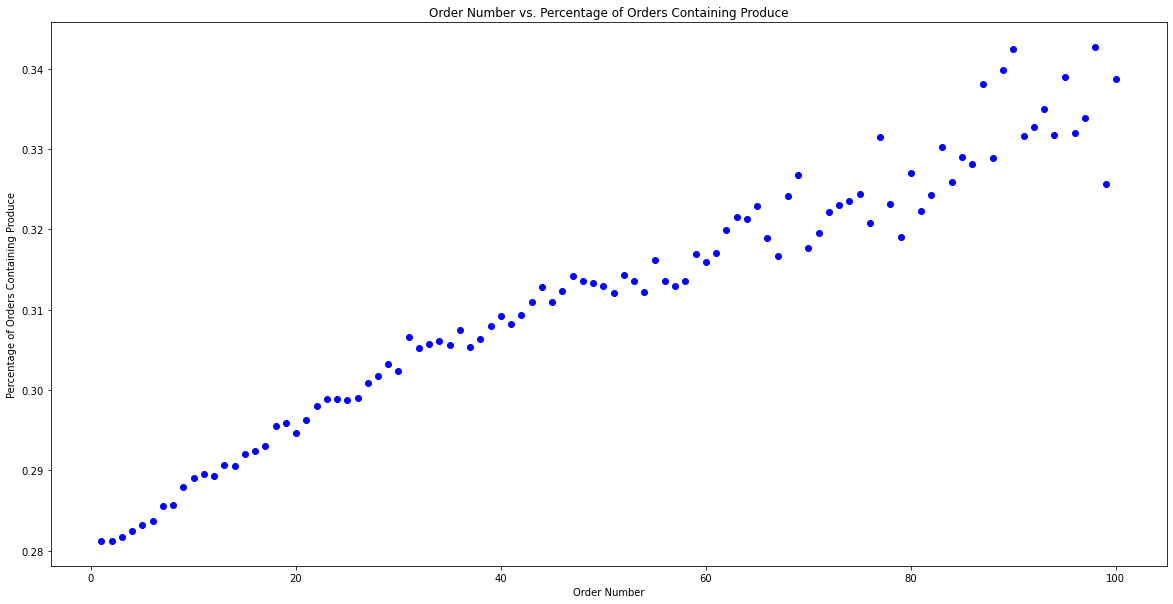

In [18]:
fig, (ax1) = plt.subplots(figsize = (20,10))

ax1.plot(group12, 'bo')
ax1.set_title("Order Number vs. Percentage of Orders Containing Produce")
plt.xlabel('Order Number')
plt.ylabel('Percentage of Orders Containing Produce')
plt.show()

In [19]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1 = sns.barplot(x=a., y='order_id_x', data=table, color='blue')


SyntaxError: invalid syntax (<ipython-input-19-efb1eca238e6>, line 3)

In [ ]:
#dept = whole.groupby('department').count()

In [ ]:
#dept.reset_index(inplace = True) 
#dept

In [ ]:
dept = pd.read_csv('dept_orders.csv')

In [ ]:
dept

In [ ]:
# fig, g = plt.subplots(figsize = (25,8))

# #s = sns.barplot(data=dept['user_id'], color = 'blue')

# #ax.legend().set_title('Segment')
# #ax.set_title('Department vs. Number of Orders')
# #ax.set_xlabel('Department')
# #ax.set_ylabel('Number of Orders')
# #ax.set_xticks(dept['department'])
# g = sns.factorplot("department", data=whole, aspect=1.5, kind="count", color="b", order=whole.department.value_counts().index)
# #g1 = sns.factorplot("department", data=dept, aspect=1.5, kind="count", color="b", order=whole.department.value_counts().index)
# g.set(xlabel='Department', ylabel='Number of Orders', title='Department vs. Number of Orders')
# g.set_xticklabels(rotation=90)


In [ ]:
dept = whole.drop_duplicates(subset='user_id', keep='first')


In [ ]:
dept.head()

In [ ]:
g = sns.factorplot("department", data=dept, aspect=1.5, kind="count", color="b", order=whole.department.value_counts().index)
g.set(xlabel='Department', ylabel='Number of Users', title='Department vs. Number of Users')
g.set_xticklabels(rotation=90)

In [ ]:
dept.set_index('department')

In [ ]:
df1 = dept.groupby('department')


In [ ]:
#dept = whole.groupby('department').nunique()
#dept

In [ ]:
#ax = sns.barplot(x="order_id", y="department", hue="user_id", data=dept)


In [ ]:
# fig, ax = plt.subplots(figsize = (25,8))

# sns.barplot(data=dept, x='department',y='user_id', color = 'blue')

# #ax.legend().set_title('Segment')
# ax.set_title('Department vs. Number of Orders')
# ax.set_xlabel('Department')
# ax.set_ylabel('Number of Orders')
# ax.set_xticks(dept['department'])
# ax.savefig("output.png")

In [ ]:
orderz = pd.read_csv('dept_orders.csv')

In [ ]:
userz = pd.read_csv('dept_unique.csv')

In [ ]:
df_merge_col = pd.merge(orderz, userz, on='department')

In [ ]:
df_merge_col.head()

In [ ]:
table = pd.pivot_table(df_merge_col, values=['user_id_x', 'order_id_x', 'Unnamed: 0_x'], index=['department'], aggfunc=np.sum)

In [ ]:
table.head()

In [ ]:
table.sort_values(by='order_id_x', ascending=False, inplace=True)
table.reset_index(inplace=True)
table.head()

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1 = sns.barplot(x=table.index, y='order_id_x', data=table, color='blue')
ax1.tick_params(axis='y')

ax1.set_xticklabels(table.department, rotation=90)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x=table.index, y='user_id_x', data=table, color = 'red')
ax2.tick_params(axis='y')


ax1.set(xlabel='Department', ylabel='Number of Orders', title='Department vs. Number of Users')
ax2.set(ylabel = 'Number of Users')

In [ ]:
# dept.to_csv('dept_unique.csv')

In [ ]:
# Read in the produce dataset
organic = pd.read_csv('produce_dataset.csv')

In [ ]:
# Drop the column of index from the previous table (no longer valid indices)
organic.drop('Unnamed: 0', axis =1, inplace=True)

In [ ]:
# Dataset is ordered by user_id
organic.head(30)

In [ ]:
# Initialize a total_produce_purchased column with all 1's 
organic['total_produce_purchased'] = 1
organic

In [ ]:
# Group the rows by user_id and add the previously initialized total_produce_purchased column (each row is 1)
# This returns a series with user_id, total_produce_purchased
orders_total = organic.groupby('order_id')['total_produce_purchased'].sum()
orders_total

In [ ]:
# Create a organic? column containing 1 for an organic produce, 0 for a non-organic produce
organic['organic?'] = organic['product_name'].str.contains('Organic').astype(int)
organic

In [ ]:
# Group the rows by user_id and add the previously initialized organic? column (1 for organic, 0 for non-organic)
# This returns a series with user_id, organic?

order_organic = organic.groupby('order_id')['organic?'].sum()
order_organic

In [ ]:
order_organic = organic.groupby('order_id')['organic?'].sum()
order_organic

In [ ]:
# Combine the total and organic series into one dataframe (user_id, total_orders, organic?)
order_df = pd.concat([orders_total, order_organic], axis=1).reset_index()
order_df

In [ ]:
# Rename the organic? column to 'organic_produce_purchased'
order_df.rename(columns = {'organic?':'organic_produce_purchased'}, inplace = True) 
order_df

In [ ]:
# Create a new 'organic_%' column that is the percentage of organic produce purchased over total produce purchased
order_df['organic_%'] = order_df['organic_produce_purchased']/order_df['total_produce_purchased']

In [ ]:
order_df

In [ ]:
df_merge_col = pd.merge(organic, order_df, on='order_id')

In [ ]:
df_merge_col

In [ ]:
group = df_merge_col.groupby(['user_id', 'order_number'])['organic_%'].mean()
group
group1 = df_merge_col.groupby('order_number')['organic_%'].mean()
df_byorder = pd.merge(df_merge_col, group1, on='order_number')

In [ ]:
group = df_merge_col.groupby(['order_number'])['user_id'].nunique()
group.sum()
#group

In [ ]:
group.head(50)

In [ ]:
#fig = plt.figure(figsize = (20,10))
fig, (ax1) = plt.subplots(figsize = (20,10))

ax1.plot(group, 'bo')
ax1.set_title("Order Number vs. Number of Orders")
plt.xlabel('Order Number')
plt.ylabel('Number of Orders')
plt.show()


In [ ]:
df_byorder.tail(30)

In [ ]:
group = df_byorder.groupby(['order_number'])['organic_%_y'].mean()
group

In [ ]:
groupuser = df_byorder.groupby(['user_id'])['organic_%_y'].mean()
groupuser

In [ ]:
new_df = pd.merge(group, groupuser,  how='left', left_on=['user_id', 'order_number'], right_on = ['user_id', 'order_number'])


In [ ]:
fig, ax = plt.subplots(figsize = (12,8))

ax = sns.scatterplot(data = group, color="blue")
ax.set_title('User Order Number - Percentage of Organic Produce')
ax.set_xlabel('Order number')
ax.set_ylabel('% of Organic Produce')
pass

In [ ]:
graph = sns.catplot(data = df_byorder, x='order_number', y='organic_%_y', height = 4, aspect = 4, color = 'blue')
graph.set_axis_labels('Order Number', '% of Organic Produce')
graph.fig.suptitle('User Order Number - Percentage of Organic Produce', y=1.05, fontsize=16, fontweight='bold')
#graph.xticks([0, 10, 20, 30])

In [ ]:
group

In [ ]:
new_df = pd.merge(df_merge_col, groupuser,  how='left', left_on=['user_id', 'order_number'], right_on = ['user_id', 'order_number'])
new_df

In [ ]:
graph = sns.catplot(data = new_df, x='order_number', y='organic_%', height = 4, aspect = 4, alpha = 0.1)
graph.set_axis_labels('Order Number', '% of Organic Produce')
graph.fig.suptitle('User Order Number - Percentage of Organic Produce', y=1.05, fontsize=16, fontweight='bold')

In [ ]:
new_df['seg'] = None

new_df.loc[new_df['organic_%'] < 0.1, 'order_seg'] = '0. No Organics'
new_df.loc[(new_df['organic_%'] >= 0.1) & (new_df['organic_%'] < 1), 'order_seg'] = 'Mixed Order'
# new_df.loc[(new_df['organic_%'] >= 0.5) & (new_df['organic_%'] < 0.75), 'order_seg'] = '2. Moderate Organics'
# new_df.loc[(new_df['organic_%'] >= 0.75) & (new_df['organic_%'] < 1), 'order_seg'] = '3. Heavy Organics'
new_df.loc[(new_df['organic_%'] == 1), 'order_seg'] = '4. All Organics'

new_df.head(30)

In [ ]:
#new_df.groupby('order_seg').count
#new_df.head

In [ ]:
plt.figure(figsize=(20,10))

plt.hist(new_df['order_seg'])
plt.xlabel('Segment')
plt.ylabel('Number of Orders')

# graph = sns.catplot(data = new_df, x='seg', height = 4, aspect = 4)
# graph.set_axis_labels('Order Number', '% of Organic Produce')
# graph.fig.suptitle('User Order Number - Percentage of Organic Produce', y=1.05, fontsize=16, fontweight='bold')

In [ ]:
# segmentation and number of orders relationship LOOK DOWN

In [ ]:
# Create a new 'segment' column and initialize it with None
user_df['segment'] = None

# Set up the customer segments per the percentage ranges below and assign the values to the 'segment' column
user_df.loc[user_df['organic_%'] < 0.01, 'segment'] = 'Never Organic'
user_df.loc[(user_df['organic_%'] >= 0.01) & (user_df['organic_%'] < 0.25), 'segment'] = 'Organic Taster'
user_df.loc[(user_df['organic_%'] >= 0.25) & (user_df['organic_%'] < 0.50), 'segment'] = 'Light Organic'
user_df.loc[user_df['organic_%'] >= 0.50, 'segment'] = 'Super Organic'

In [ ]:
user_df

In [ ]:
# Filter the user dataframe by removing all users with total produce purchased <10
df_filtered = user_df[user_df['total_produce_purchased'] > 9] 
df_filtered

In [ ]:
# Check the segments
df_filtered['segment'].unique()

In [ ]:
# Plot the count of each segment

plt.figure(figsize=(10,8))

plt.hist(df_filtered['segment'])

plt.title('Histogram of Customer Segments')
plt.xlabel('Segments')
plt.ylabel('Count')

pass

In [ ]:
# Plot the histogram of percentage organic from 0-1
plt.figure(figsize=(12,10))

plt.hist(df_filtered['organic_%'], bins = 100)

plt.title('Histogram of Organic %')
plt.xlabel('Percentage (in decimal form)')
plt.ylabel('Count')

pass

### NEEDS FIXIN!


In [ ]:
# Plot the density of percentage organic distribution from 0-1

plt.figure(figsize=(12,10))

sns.distplot(df_filtered['organic_%'], hist=True, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
pass

In [ ]:
order_total = organic.groupby('order_id')['organic?'].count()
order_organic = organic.groupby('order_id')['organic?'].sum()
order_percent = user_organic / user_total

order_df = pd.concat([order_total, order_organic, order_percent], axis=1).reset_index()
order_df